   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

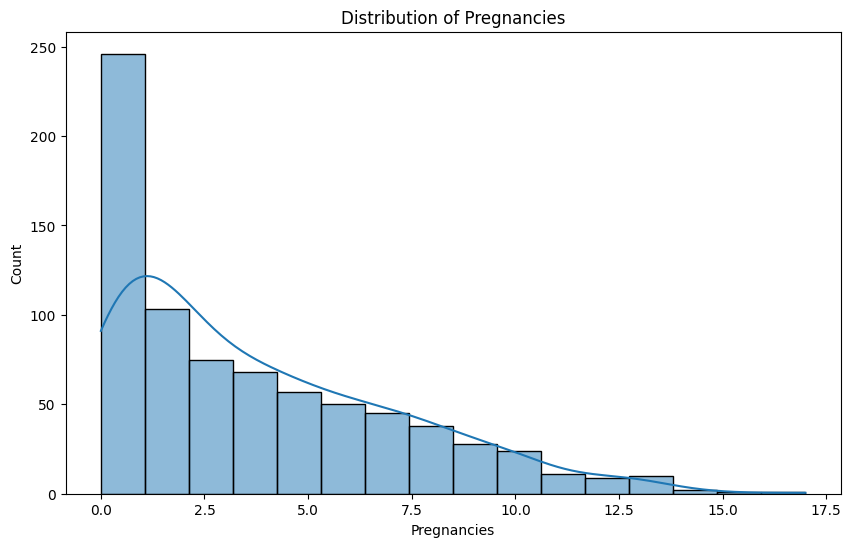

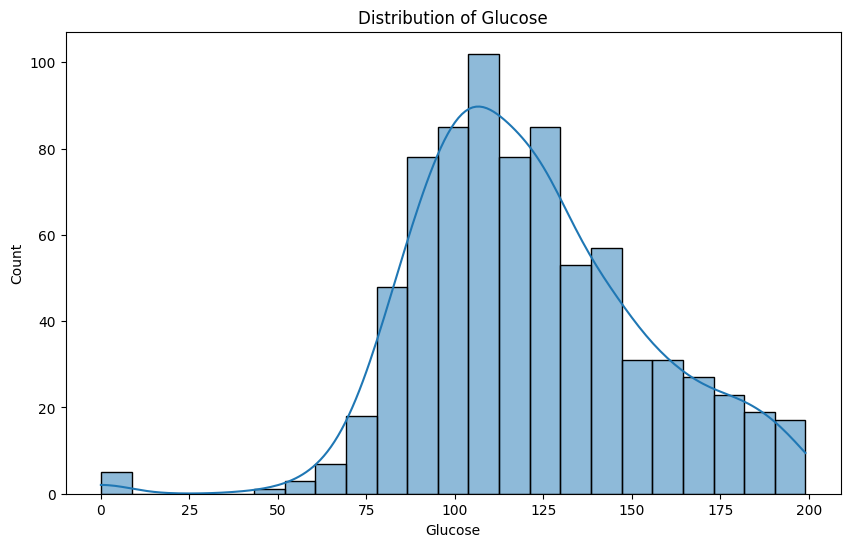

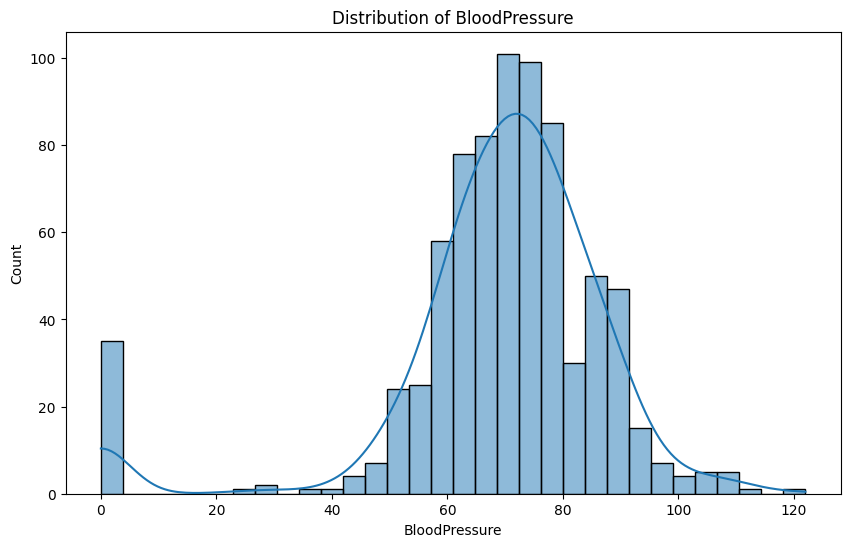

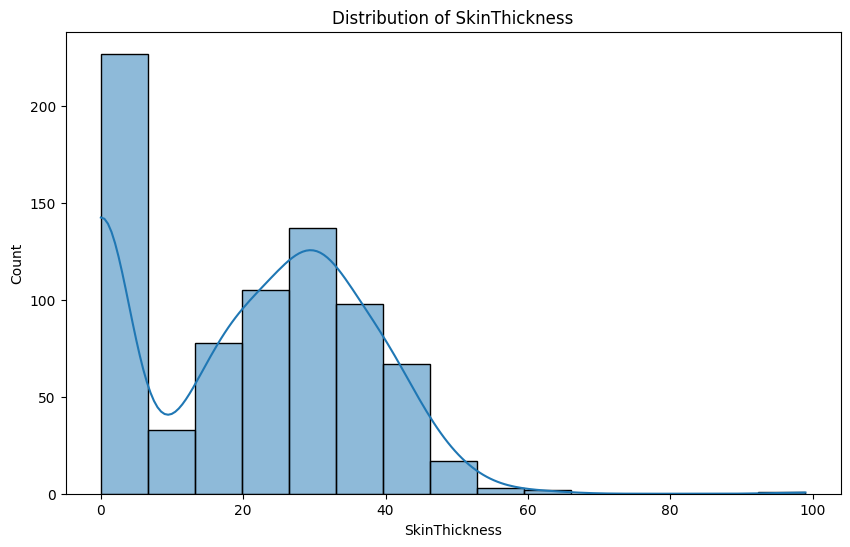

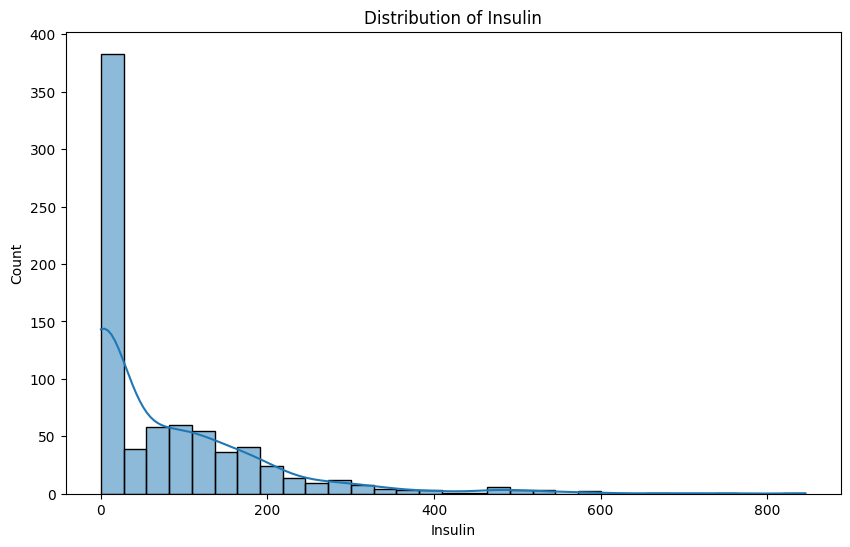

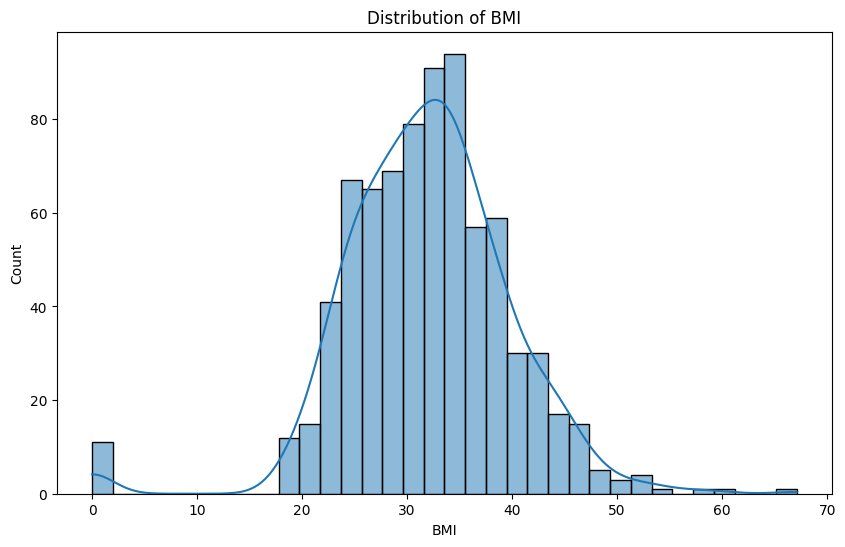

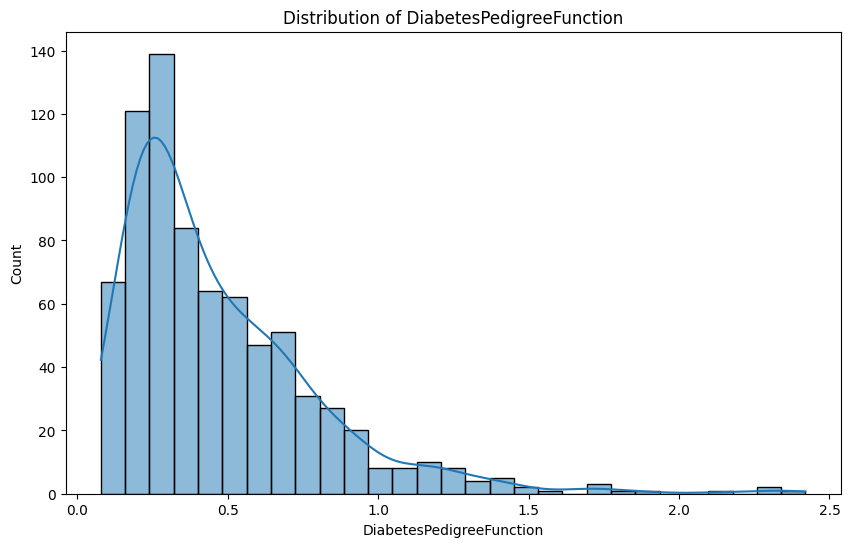

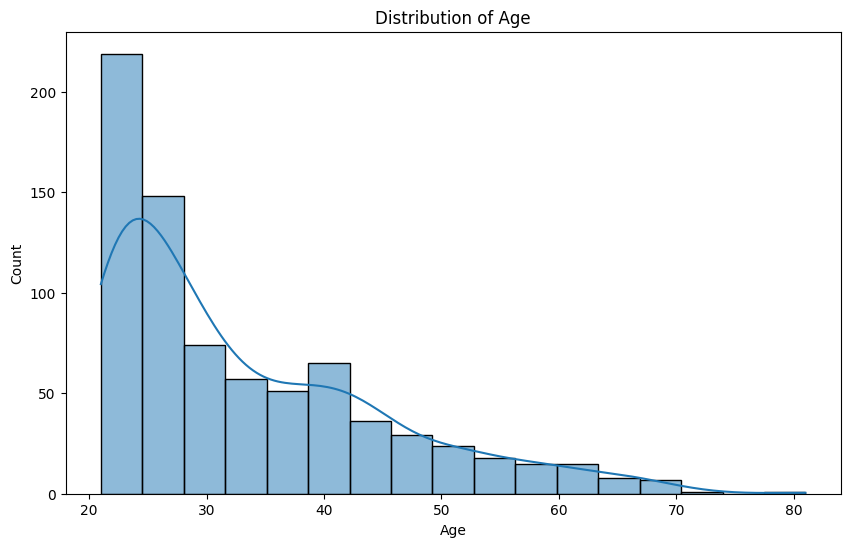

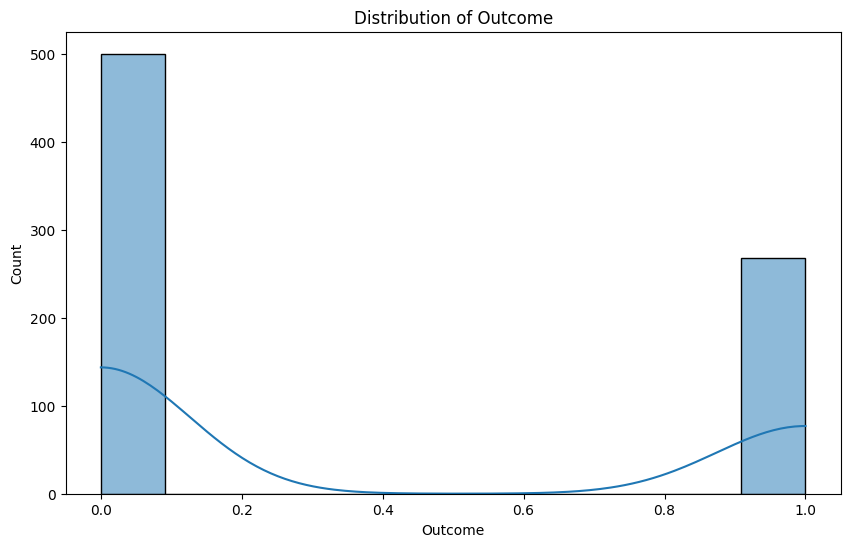

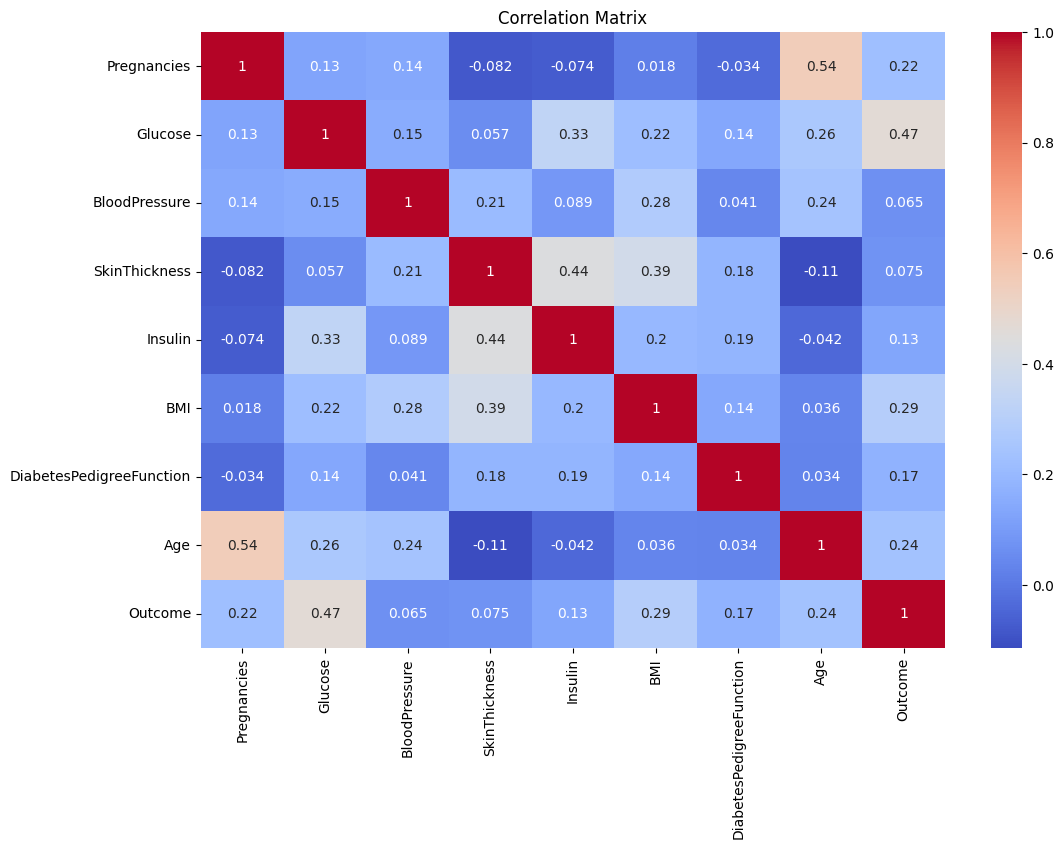

Number of duplicate rows: 0


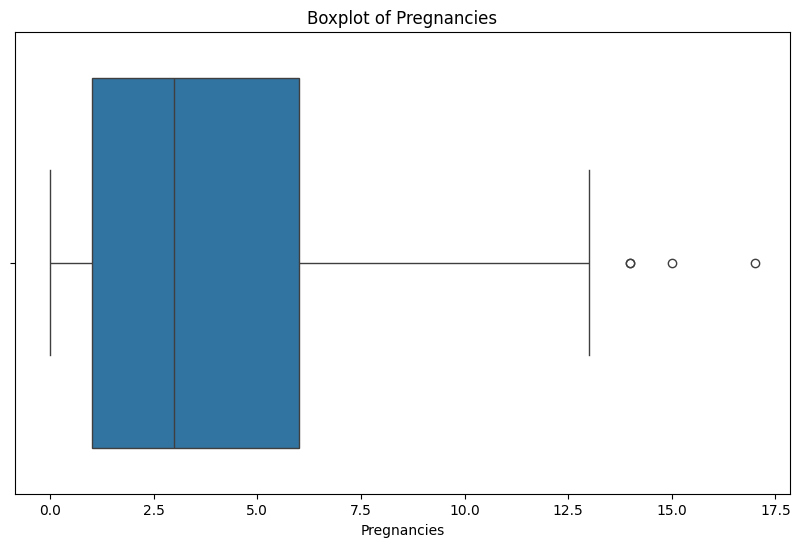

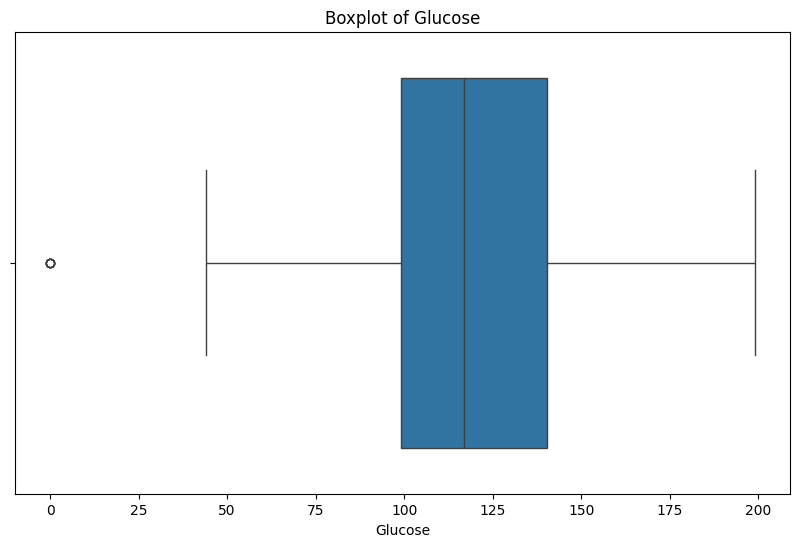

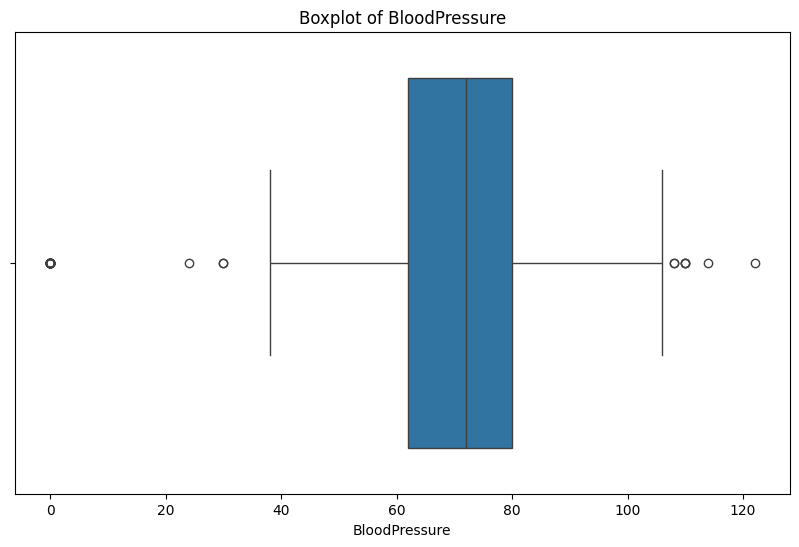

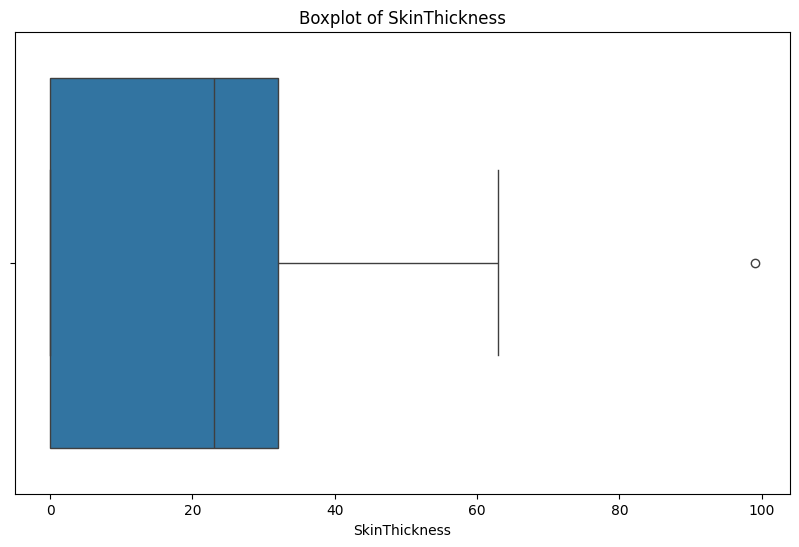

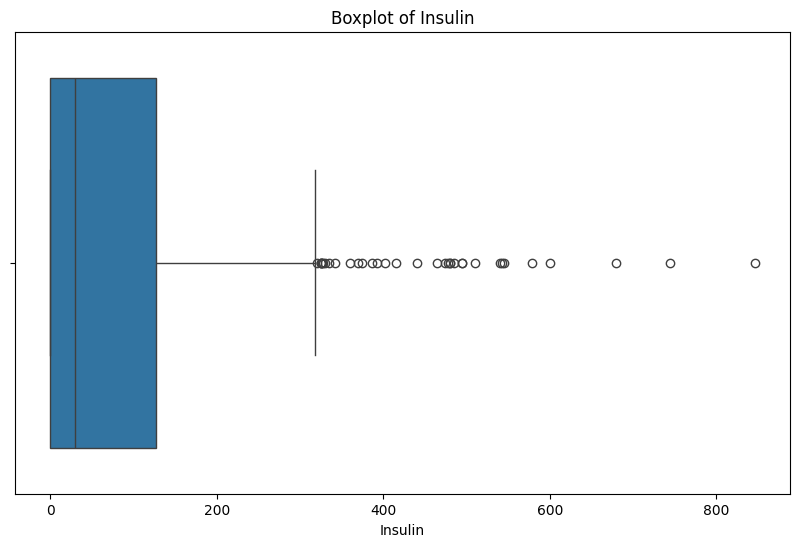

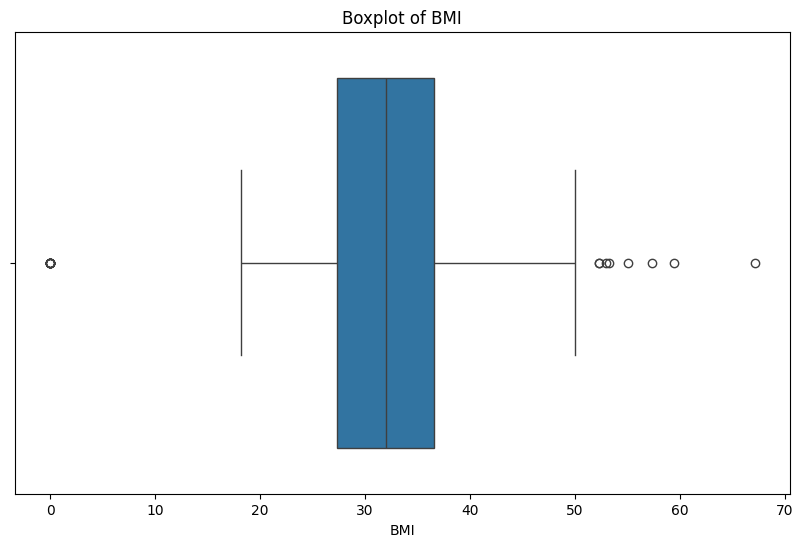

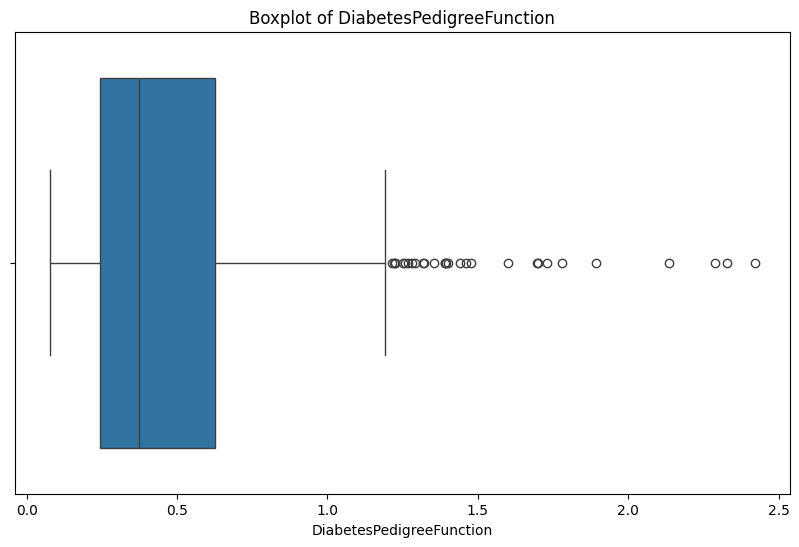

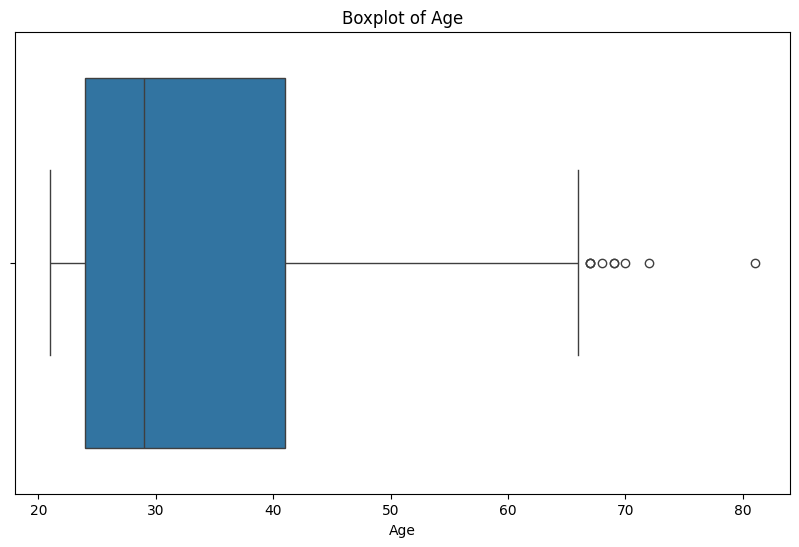

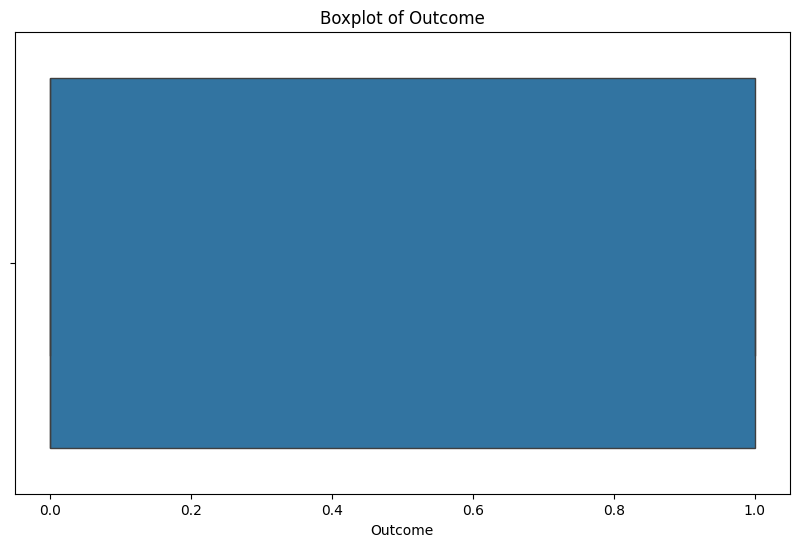

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('diabetes.csv')

# 1. Display the first few rows of the dataset
print(df.head())

# 2. Display basic information and summary statistics
print(df.info())
print(df.describe())

# 3. Check and handle missing values
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# If there are missing values, fill them or drop them
df = df.dropna()  # Dropping missing values as an example

# 4. Visualize the distribution of numerical features and the target variable
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# 5. Visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 6. Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_rows}')

# Drop duplicate rows if any
df = df.drop_duplicates()

# 7. Display unique values in categorical features
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    unique_values = df[feature].unique()
    print(f'Unique values in {feature}: {unique_values}')

# 8. Create boxplots to check for outliers
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

# Save the cleaned dataset
df.to_csv('cleaned_diabetes_dataset.csv', index=False)